In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# list the directories in the home directory
import os
os.listdir('.')

['.config', 'drive', 'sample_data']

In [3]:
import pickle

path = "/content/drive/My Drive/AutonomousDriving"
pickle_in = open(path+"/trainColour.pickle","rb")
# Remove binary version
trainImagesAndLabels = pickle.load(pickle_in)

In [ ]:
print(trainImagesAndLabels[12305])

[array([[[127, 153, 149],
        [135, 161, 157],
        [181, 185, 187],
        ...,
        [103, 116, 118],
        [ 99, 115, 122],
        [111, 127, 133]],

       [[130, 153, 145],
        [148, 172, 163],
        [172, 184, 177],
        ...,
        [ 91, 119, 117],
        [102, 117, 121],
        [116, 131, 135]],

       [[110, 138, 131],
        [143, 170, 164],
        [171, 182, 176],
        ...,
        [101, 120, 112],
        [103, 119, 119],
        [103, 119, 119]],

       ...,

       [[237, 242, 232],
        [237, 242, 232],
        [237, 241, 235],
        ...,
        [237, 239, 234],
        [236, 240, 230],
        [236, 240, 230]],

       [[237, 243, 231],
        [237, 243, 231],
        [239, 239, 237],
        ...,
        [236, 240, 228],
        [236, 240, 230],
        [236, 240, 230]],

       [[237, 242, 228],
        [239, 243, 229],
        [238, 242, 237],
        ...,
        [236, 240, 230],
        [238, 238, 233],
        [238, 238, 233]

shuffle the input pickle 

In [ ]:
#import random
#random.shuffle(trainImagesAndLabels)

Split the initial input files into the images labels and speeds

In [4]:
imageId = []
X = []
y_angle = []
y_speed = []
for id,image,lbl_angle,lbl_speed in trainImagesAndLabels:
  #checking = image
  if np.count_nonzero(pd.isnull(image)): 
    print("NA: This image was not read well so we will skip for now")
  else:
    imageId.append(id)
    X.append(image)
    y_angle.append(lbl_angle)
    y_speed.append(lbl_speed)
    

numberOfImages = len(X) # 13798 - 5 None = 13793
#img_rows = len(X[0]) #240
#img_col =  len(X[0][0]) # 320
#channels = len(X[0][0][0]) # 3
print(len(X), len(y_angle))

NA: This image was not read well so we will skip for now
NA: This image was not read well so we will skip for now
NA: This image was not read well so we will skip for now
NA: This image was not read well so we will skip for now
NA: This image was not read well so we will skip for now
13793 13793


Check that the shape its correct for the training (number of images, image_rows, image_columns, channels)

In [7]:
y_angle = np.array(y_angle)
y_speed = np.array(y_speed)
X = np.array(X)
#X.shape

986
0.6875


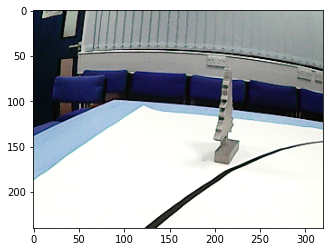

In [13]:
print(imageId[900])
plt.imshow(X[900,:,:,:])
print(y_angle[900])

Serialize all of the above is the RAM space they take is too much, 3 channel version

In [11]:
with open('/content/drive/My Drive/AutonomousDriving/X.pickle', 'wb') as ff:
  pickle.dump(X, ff)
with open('/content/drive/My Drive/AutonomousDriving/y_angle.pickle', 'wb') as ff:
  pickle.dump(y_angle, ff)
with open('/content/drive/My Drive/AutonomousDriving/y_speed.pickle', 'wb') as ff:
  pickle.dump(y_speed, ff)
with open('/content/drive/My Drive/AutonomousDriving/image_id.pickle', 'wb') as ff:
  pickle.dump(imageId, ff)

Gray scaled data

In [ ]:
#with open('/content/drive/My Drive/AutonomousDriving/X_gray.pickle', 'wb') as ff:
#  pickle.dump(X, ff)
#with open('/content/drive/My Drive/AutonomousDriving/y_angle_gray.pickle', 'wb') as ff:
#  pickle.dump(y_angle, ff)
#with open('/content/drive/My Drive/AutonomousDriving/y_speed_gray.pickle', 'wb') as ff:
#  pickle.dump(y_speed, ff)

Split to train (80%) and test (20%) dataset

In [ ]:
ntrain = np.int(0.8 * numberOfImages) 

2759


In [ ]:
X_train = X[0:ntrain,:,:,:]
y_angle_train = y_angle[0:ntrain]
y_speed_train = y_speed[0:ntrain]
#print(X_train.shape)
X_test = X[ntrain:numberOfImages,:,:,:]
y_angle_test = y_angle[ntrain:numberOfImages]
y_speed_test = y_speed[ntrain:numberOfImages]
#X_test.shape